In [1]:
# standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal as mvn

## 2.1 Plot $y = -3x^2 + 72x + 70$.

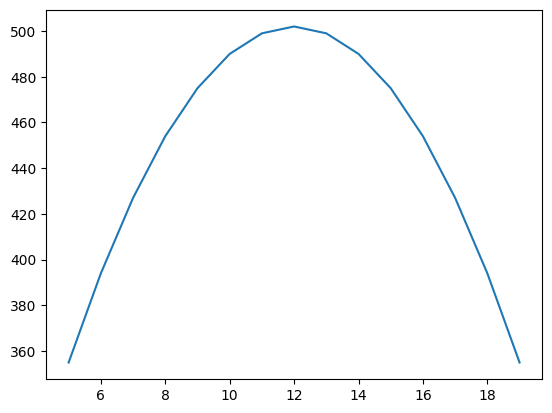

In [2]:
# Your code here
# https://medium.com/guvi/python-program-to-plot-the-function-y-x%C2%B2-using-the-pyplot-or-matplotlib-libraries-8680e17e98f1
x_cords = range(5,20)
y_cords = [-3*x**2 + 72*x + 70 for x in x_cords]

plt.plot(x_cords, y_cords)
plt.show()

## 2.3 Plot $f(x_1, x_2)$.

Text(0.5, 0.92, '3D Visualization of Height Function')

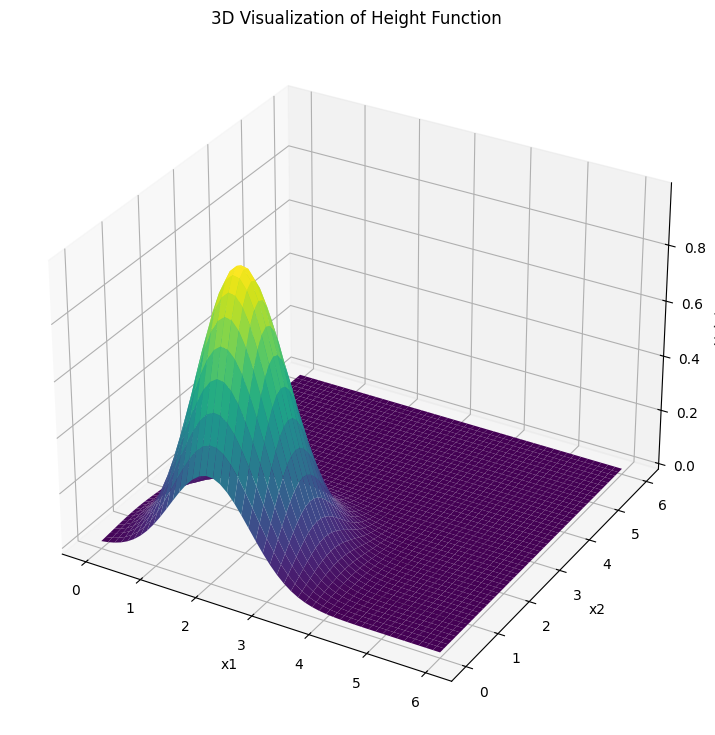

In [3]:
# Your code here
# 
def height_function(x1, x2):
    return np.exp(-(x1 - 2)**2 - (x2 - 1)**2)
x_values = np.linspace(0, 6)
x1, x2 = np.meshgrid(x_values, x_values)
height = height_function(x1, x2)

fig = plt.figure(figsize=(14, 9))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1, x2, height, cmap='viridis')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Height')
ax.set_title('3D Visualization of Height Function')

## 3.1(a) Draw from joint distribution of $(S, W)$ and generate bivariate histogram.

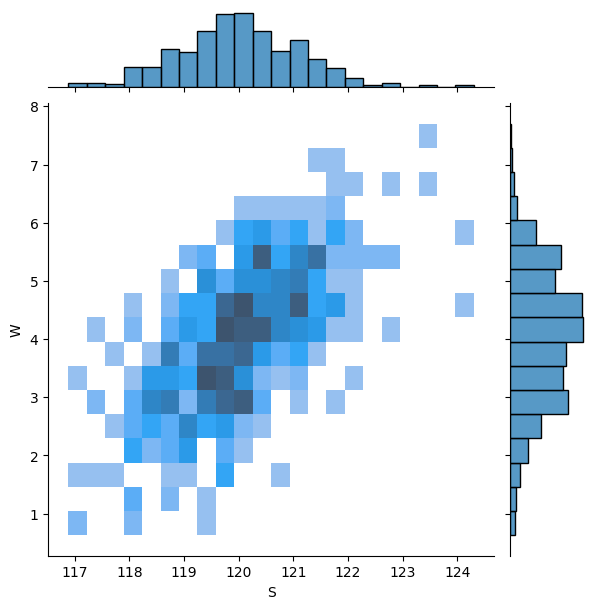

In [4]:
# Your code here
cov = np.array([[1.5, 1], [1, 1.5]], np.float32)
mean = np.array([120, 4], np.float32)
n=500

distribution = mvn(mean=mean, cov=cov)


samples = distribution.rvs(size=n)

sns.jointplot(x=samples[:, 0], y=samples[:, 1], kind="hist")


# Display the plot
plt.xlabel("S")
plt.ylabel("W")
plt.show()

#


In [5]:
samples

array([[119.32498118,   3.06802933],
       [120.37684445,   5.10268658],
       [121.2486367 ,   5.32791018],
       [118.32881344,   2.78044242],
       [121.02590722,   4.45552414],
       [121.36106189,   3.86460374],
       [120.20103178,   2.76082625],
       [120.36773588,   3.97598055],
       [119.34702373,   3.57252168],
       [120.54684457,   3.90046967],
       [117.94087246,   4.69196859],
       [119.61938397,   1.86140758],
       [118.83942496,   2.72823528],
       [120.24584084,   5.46467547],
       [118.97116731,   5.26216691],
       [120.00872018,   3.74107075],
       [120.56438474,   3.9746017 ],
       [120.10104485,   2.92787662],
       [119.72386779,   2.70742192],
       [121.11231074,   3.78339177],
       [119.79785358,   2.96586969],
       [120.09935373,   3.84929361],
       [120.93206674,   4.54635256],
       [121.20482627,   4.81289149],
       [119.34620616,   4.57061485],
       [118.96007629,   3.44055533],
       [119.67954885,   3.9257489 ],
 

## 3.2 Plot the joint PDFs at $S=118$ and $S=122$, varying $W$.

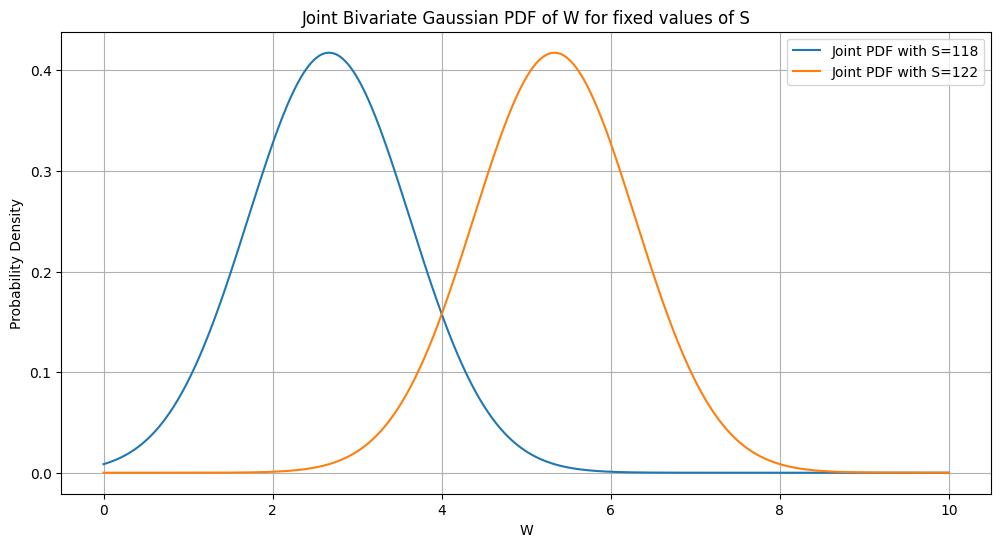

In [6]:
# Your code here
# we find pdf of w given S, so conditional pdf ??'
mean_s = 120
mean_w = 4
var_s, var_w = 1.5, 1.5
cov_sw = 1

mu_w_s118 = mean_w + cov_sw / var_s * (118 - mean_s)
mu_w_s122 = mean_w + cov_sw / var_s * (122 - mean_s)

cond_var_w = var_w - cov_sw/var_s

W_values = np.linspace(0, 10, 1001)

pdf_W_given_S_118 = mvn.pdf(W_values, mu_w_s118, np.sqrt(cond_var_w))
pdf_W_given_S_122 = mvn.pdf(W_values, mu_w_s122, np.sqrt(cond_var_w))

plt.figure(figsize=(12, 6))
plt.plot(W_values, pdf_W_given_S_118, label='Joint PDF with S=118')
plt.plot(W_values, pdf_W_given_S_122, label='Joint PDF with S=122')
plt.title('Joint Bivariate Gaussian PDF of W for fixed values of S')
plt.xlabel('W')
plt.ylabel('Probability Density')
plt.legend()
plt.grid()
plt.show()



## 3.5(a) Function to simulate draws from $T^{*}$.

In [7]:
# Your code here
#NT24
from scipy.stats import poisson
from scipy import stats

N_dist = stats.poisson(mu=3,)
e_dist = stats.norm(0,5)

cov = np.array([[1.5, 1], [1, 1.5]], np.float32)
mean = np.array([120, 4], np.float32)


dist = mvn(cov = cov, mean = mean, seed = 1000) 

def calc(size):
    cum_sum = 0
    for i in range(0,24):
        dist_rv = dist.rvs(size)
        N = N_dist.rvs(size)
        S = dist_rv[:, 0]
        W = dist_rv[:, 1]
        e = e_dist.rvs(size)
        cum_sum +=  (60 + 0.6 * W  + 0.2 * S + e) * N
    return cum_sum



## 3.5(b) Empirically estimate the mean and standard deviation of $T^{*}$ by generating $1000$ samples.

In [8]:
# Your code here
simulation = calc(1000)
mean_simulation = np.mean(simulation)
std_simulation = np.std(simulation)

In [9]:
mean_simulation, std_simulation

(6229.198483657504, 736.8584871071408)